# 导入包

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.13.1'

In [3]:
tf.keras.__version__

'2.2.4-tf'

# Hello World

In [4]:
h = tf.constant("Hello")
w = tf.constant(" World!")
hw = h + w
print(hw)

with tf.Session() as session:
    ans = session.run(hw)
    
print(ans)

Tensor("add:0", shape=(), dtype=string)
b'Hello World!'


# MNIST handwritten digits dataset

MNIST: Mixed National Institute of Standards and Technology

pixels: 28 x 28 = 784

- classifier: softmax regression
- detailed description: https://medium.com/%E6%89%8B%E5%AF%AB%E7%AD%86%E8%A8%98/%E4%BD%BF%E7%94%A8-tensorflow-%E5%AD%B8%E7%BF%92-softmax-%E5%9B%9E%E6%AD%B8-softmax-regression-41a12b619f04

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
DATA_DIR = '/tmp/mnist' # data to save locally
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

## data

In [7]:
data = input_data.read_data_sets(DATA_DIR, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
!ls -al /tmp/mnist

total 22672
drwxr-xr-x   6 zhoujiagen  wheel      192 Apr 24 11:40 .
drwxrwxrwt  16 root        wheel      512 Apr 24 12:04 ..
-rw-r--r--   1 zhoujiagen  wheel  1648877 Apr 24 11:40 t10k-images-idx3-ubyte.gz
-rw-r--r--   1 zhoujiagen  wheel     4542 Apr 24 11:40 t10k-labels-idx1-ubyte.gz
-rw-r--r--   1 zhoujiagen  wheel  9912422 Apr 24 11:40 train-images-idx3-ubyte.gz
-rw-r--r--   1 zhoujiagen  wheel    28881 Apr 24 11:40 train-labels-idx1-ubyte.gz


## parameter

In [9]:
# placeholder: 占位符
# Variable: 变量

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x, W)

Instructions for updating:
Colocations handled automatically by placer.


## optimization

In [10]:
# loss function: cross entropy
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        logits=y_pred, 
        labels=y_true))
# gradient descent optimization
gdo = tf.train.GradientDescentOptimizer(0.5) # learning rate: 0.5
gd_step = gdo.minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## evaluation

In [11]:
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

## train, test

In [12]:
# OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
# https://github.com/dmlc/xgboost/issues/1715

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
with tf.Session() as session:
    # train
    session.run(tf.global_variables_initializer()) # initialize variables
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        session.run(gd_step, 
                    feed_dict={x: batch_xs, 
                               y_true: batch_ys})
    # test
    ans = session.run(accuracy, 
                      feed_dict={x: data.test.images, 
                                 y_true: data.test.labels})
print("Accuracy: {}".format(ans))    

Accuracy: 0.9169999957084656


# TF Basics

## Graph

- node: operation
- edge: tensor object

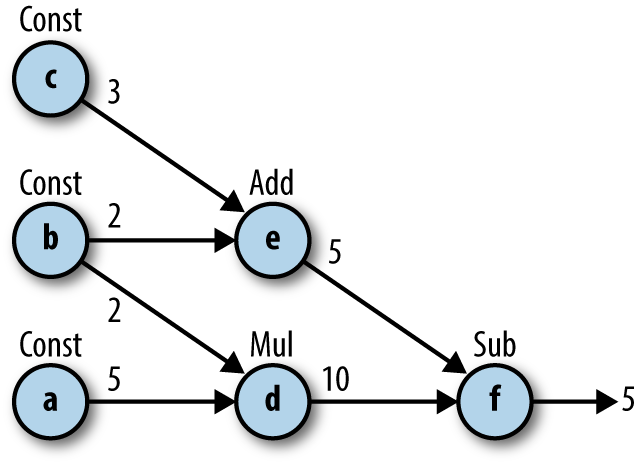

In [7]:
# tf.<operator>
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

d = tf.multiply(a, b)
e = tf.add(b, c)
f = tf.subtract(d, e)

In [10]:
print(tf.get_default_graph())
g = tf.Graph()
print(g)
print(a.graph is g)
print(a.graph is tf.get_default_graph())

False
True


In [11]:
g1 = tf.get_default_graph()
g2 = tf.Graph()
print(g1 is tf.get_default_graph())

with g2.as_default():
    print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


## Session

In [6]:
with tf.Session() as session:
    ans = session.run(f)

print(ans)

5


## Fetches

In [13]:
with tf.Session() as session:
    fetches = [a,b,c,d,e,f]
    ans = session.run(fetches=fetches)
print(ans)
print(type(ans[0]))

[5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


## Tensors

In [14]:
c = tf.constant(4.0)
print(c) # name, shape, dtype

Tensor("Const_6:0", shape=(), dtype=float32)


### Data Type

- numerical
- boolean
- string

In [17]:
c = tf.constant(4.9, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_9:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [18]:
# cast
x = tf.constant([1,2,3], name='x', dtype=tf.float32)
print(x)
x = tf.cast(x, tf.int64)
print(x)

Tensor("x:0", shape=(3,), dtype=float32)
Tensor("Cast:0", shape=(3,), dtype=int64)


### Tensor Array

- Tensor

the name of an object used in the Python API as a handle for the result of an operation in the graph

- tensor

a mathematical term for n-dimensional arrays

In [19]:
# Python list
c = tf.constant([[1,2,3],
                [4,5,6]])
print(c)

Tensor("Const_10:0", shape=(2, 3), dtype=int32)


In [21]:
# Numpy array
import numpy as np

c = tf.constant(np.array([
    [[1,2,3],
     [4,5,6]],
    
    [[1,1,1],
     [2,2,2]]
]))
print(c)

Tensor("Const_11:0", shape=(2, 2, 3), dtype=int64)


In [24]:
# random number generator
print(tf.random.normal(shape=(2,2))) # normal distrubution
print(tf.random.truncated_normal(shape=(2,2))) # truncated normal distribution
print(tf.random.uniform(shape=(2,2))) # uniform distribution

Tensor("random_normal_1:0", shape=(2, 2), dtype=float32)
Tensor("truncated_normal:0", shape=(2, 2), dtype=float32)
Tensor("random_uniform:0", shape=(2, 2), dtype=float32)


In [26]:
c = tf.linspace(0.0, 4.0, 5) # line space
print(c)
session = tf.InteractiveSession()
print(c.eval())
session.close()

Tensor("LinSpace_1:0", shape=(5,), dtype=float32)
[0. 1. 2. 3. 4.]


In [38]:
# Matrix multiplication
# Ax = b
A = tf.constant([[1,2,3],
                [4,5,6]])
x = tf.constant([1,0,1])
print('A={}'.format(A))
print('x={}'.format(x))
x = tf.expand_dims(x, 1) # 1D vector => 2D single column matrix
print('x={}'.format(x))
b = tf.matmul(A, x)
session = tf.InteractiveSession()
print('A={}'.format(A.eval()))
print('x={}'.format(x.eval()))
print('b={}'.format(b.eval()))
session.close()

A=Tensor("Const_34:0", shape=(2, 3), dtype=int32)
x=Tensor("Const_35:0", shape=(3,), dtype=int32)
x=Tensor("ExpandDims_3:0", shape=(3, 1), dtype=int32)
A=[[1 2 3]
 [4 5 6]]
x=[[1]
 [0]
 [1]]
b=[[ 4]
 [10]]


### Name

In [40]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c') # intrinsic string name
    c2 = tf.constant(4, dtype=tf.int32, name='c')
print(c1)
print(c2)

Tensor("c:0", shape=(), dtype=float64)
Tensor("c_1:0", shape=(), dtype=int32)


In [41]:
# name scope
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c')
    with tf.name_scope('prefix_name'):
        c2 = tf.constant(4, dtype=tf.int32, name='c')
        c3 = tf.constant(4, dtype=tf.float64, name='c')
print(c1)
print(c2)
print(c3)

Tensor("c:0", shape=(), dtype=float64)
Tensor("prefix_name/c:0", shape=(), dtype=int32)
Tensor("prefix_name/c_1:0", shape=(), dtype=float64)


### Variable

- the parameter of models
- maintain fixed state in graph

In [53]:
init_val = tf.random.normal(shape=(1,5), mean=0, stddev=1)
var = tf.Variable(init_val, name='var')
print(var)

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    post_var = session.run(var)

print(post_var)

<tf.Variable 'var_13:0' shape=(1, 5) dtype=float32_ref>
[[-1.0387472  -0.428862   -0.33240804 -1.070892   -1.2820671 ]]


In [ ]:
# 怎么重用变量???

### Placeholder

- feeding input values

empty variables, will be filled with data later

In [66]:
import numpy as np
x_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

with tf.Graph().as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(5, 10))
    w = tf.placeholder(dtype=tf.float32, shape=(10, 1))
    b = tf.fill(dims=(5,1), value=-1.)
    xw = tf.matmul(x, w)
    
    xwb = tf.add(xw, b)
    s = tf.reduce_max(xwb)
    with tf.Session() as session:
        # feed for placeholder: x, w
        ans = session.run(fetches=s, 
                          feed_dict={x: x_data, 
                                     w: w_data})
        print(session.graph_def)
print(ans)

1.6862931


## Optimization

- LaTeX Math Symbols: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

### regression model


$$f(x_i) = w^Tx_i + b$$
$$y_i = f(x_i) + \varepsilon_i$$


In [70]:
x = tf.placeholder(tf.float32, shape=[None, 3])
y_true = tf.placeholder(tf.float32, shape=None)
w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weight')
b = tf.Variable(0, dtype=tf.float32, name='bias')
y_pred = tf.matmul(w, tf.transpose(w)) + b

### loss function

- MSE: mean square error

$$L(y, \hat{y}) = \frac{i}{n}\sum_{i=1}^{n}(y_i - \hat{y})^2$$

- cross entropy: for categorial data

$$H(p, q) = -\sum_{x}p(x) \log q(x)$$

In [72]:
loss_mse = tf.reduce_mean(tf.square(y_true - y_pred))

In [73]:
loss_ce = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=y_pred, 
        labels=y_true))

### gradient descent optimizor

In [74]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss_ce)

Instructions for updating:
Use tf.cast instead.


### Example: linear regression

In [43]:
# data
import numpy as np

x_data = np.random.randn(2000, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(1, 2000) * 0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise

In [3]:
x_data

array([[ 0.39351294, -2.37036786,  0.98975031],
       [-0.85421857,  0.27561734, -2.01503238],
       [ 1.76695131, -0.48566782,  0.13709807],
       ...,
       [-0.38455845, -1.69722506,  0.7334742 ],
       [ 0.78906321,  0.82917123, -0.11128583],
       [-0.5719897 , -0.80846917, -1.25816597]])

In [4]:
y_data

array([[-0.99725663, -0.56589123,  0.12208161, ..., -1.11160444,
         0.52746224, -0.79998217]])

In [44]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [45]:
print('w_real={}'.format(w_real))
print('b_real={}'.format(b_real))

NUM_STEPS = 10
g = tf.Graph()
wb_ = []

with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        train = optimizer.minimize(loss=loss)

    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        for step in range(NUM_STEPS):
            _, loss_val = session.run(fetches=[train, loss], 
                                      feed_dict={x: x_data, 
                                                 y_true: y_data})
#             if(step % 5 == 0):
#                 print(step, session.run([w, b]))
#                 wb_.append(session.run([w, b]))
            print(step, session.run([w, b]), loss_val)

        print(step+1, session.run([w, b]))

w_real=[0.3, 0.5, 0.1]
b_real=-0.2
0 [array([[0.29701254, 0.49204862, 0.09861661]], dtype=float32), -0.20370908] 0.39305073
1 [array([[0.29564512, 0.49768442, 0.10090394]], dtype=float32), -0.20030656] 0.009600601
2 [array([[0.29611352, 0.49746138, 0.10079753]], dtype=float32), -0.20046154] 0.009552826
3 [array([[0.2960763 , 0.49748477, 0.10081516]], dtype=float32), -0.20043764] 0.009552552
4 [array([[0.29608023, 0.49748254, 0.10081352]], dtype=float32), -0.20043954] 0.009552548
5 [array([[0.29607987, 0.49748278, 0.10081369]], dtype=float32), -0.20043935] 0.009552549
6 [array([[0.2960799 , 0.49748275, 0.10081367]], dtype=float32), -0.20043936] 0.0095525505
7 [array([[0.2960799 , 0.49748275, 0.10081367]], dtype=float32), -0.20043936] 0.00955255
8 [array([[0.2960799 , 0.49748275, 0.10081367]], dtype=float32), -0.20043936] 0.00955255
9 [array([[0.2960799 , 0.49748275, 0.10081367]], dtype=float32), -0.20043936] 0.00955255
10 [array([[0.2960799 , 0.49748275, 0.10081367]], dtype=float32), -0

### Example: logistic regression

$$Pr(y_i = 1 | x_i) = \frac{1}{1 + exp^{wx_{i}+b}}$$

In [47]:
import numpy as np

N = 20000

def sigmod(x):
    return 1 / (1 + np.exp(-x))

x_data = np.random.randn(N, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

wxb = np.matmul(w_real, x_data.T) + b_real

y_data_pre_noise = sigmod(wxb)
y_data = np.random.binomial(1, y_data_pre_noise)

In [50]:
print('y_data={}'.format(y_data))
print('w_real={}'.format(w_real))
print('b_real={}'.format(b_real))


NUM_STEPS = 50

x = tf.placeholder(tf.float32, shape=[None, 3])    
y_true = tf.placeholder(tf.float32, shape=None)
    
w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
b = tf.Variable(0, dtype=tf.float32, name='bias')
y_pred = tf.matmul(w, tf.transpose(x)) + b

loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y_true)
loss = tf.reduce_mean(loss)

learning_rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss=loss)

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for step in range(NUM_STEPS):
        _, loss_val = session.run(fetches=[train, loss], 
                                  feed_dict={x: x_data,
                                            y_true: y_data})
        if (step % 5 == 0):
            print(step, session.run([w,b]), loss_val)
    print(step+1, session.run([w,b]))    

y_data=[1 1 0 ... 0 0 0]
w_real=[0.3, 0.5, 0.1]
b_real=-0.2
0 [array([[0.03457896, 0.0561118 , 0.01210436]], dtype=float32), -0.026824981] 0.6931459
5 [array([[0.15382491, 0.24808949, 0.05369768]], dtype=float32), -0.11783021] 0.66231847
10 [array([[0.21829456, 0.35050026, 0.07602905]], dtype=float32), -0.16552825] 0.6536972
15 [array([[0.25468096, 0.40763423, 0.08854072]], dtype=float32), -0.19162278] 0.6510524
20 [array([[0.2757998 , 0.4404659 , 0.09574994]], dtype=float32), -0.20632449] 0.6501869
25 [array([[0.28825974, 0.45966944, 0.0999739 ]], dtype=float32), -0.21476203] 0.6498924
30 [array([[0.29568028, 0.47102004, 0.10247324]], dtype=float32), -0.21966134] 0.64979005
35 [array([[0.30012313, 0.47777084, 0.10396073]], dtype=float32), -0.22252771] 0.64975375
40 [array([[0.30279097, 0.4818008 , 0.10484906]], dtype=float32), -0.22421324] 0.6497408
45 [array([[0.30439547, 0.48421183, 0.10538065]], dtype=float32), -0.22520787] 0.64973617
50 [array([[0.30520508, 0.48542327, 0.10564779]